<a href="https://colab.research.google.com/github/EmreCibikci/Fashion_Mnist_Goruntu_siniflandirma/blob/main/G%C3%B6r%C3%BCnt%C3%BC_s%C4%B1n%C4%B1fland%C4%B1rma_proje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Merhaba, bu benimle (Yunusemre Çıbıkçı) iletişime geçmiş olduğunuz görüntü sınıflandırması için oluşturduğum projedir.
1. **Veri Setini Yükleme** ( moda ürünlerinin 28x28 piksel boyutundaki görüntülerinden oluşan bir veri seti olan MNIST FASHION veri setini kullanacağım.)  link : https://www.kaggle.com/datasets/zalando-research/fashionmnist

2. Veri setini eğitim ve test verisetine böl

3. Normalizasyon işlemleri

4. Model oluşturulması, eğitimi

5. Model doğrululuğunu ölçme


# 1.  Load the dataset

In [1]:
from keras.datasets import fashion_mnist

In [2]:
# split the data
(X_train,X_labels), (y_train,y_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# 2. Split the data

In [3]:
# check their shapes
X_train.shape, X_labels.shape, y_train.shape, y_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# check X_train how to look
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

# Normalization the data



In [6]:
X_train = X_train / 255.0
y_train = y_train /255.0


In [7]:
#chececk their shapes and plot it
X_train.shape, y_train.shape

((60000, 28, 28), (10000, 28, 28))

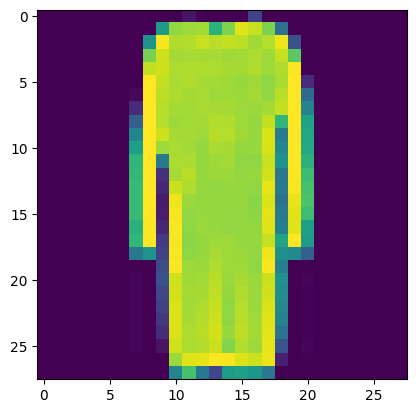

In [9]:
import matplotlib.pyplot as plt

plt.imshow(X_train[25])

Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

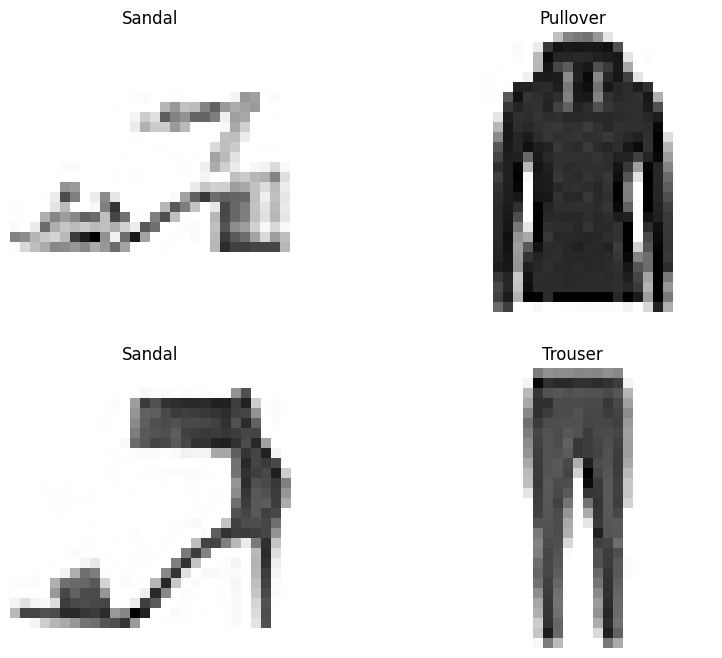

In [14]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
import random
import matplotlib.pyplot as plt
#figure plot
plt.figure(figsize=(10,8))
for i in range(4):
  ax= plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], plt.cm.binary)
  plt.title(class_names[X_labels[rand_index]])
  plt.axis(False)

# model oluşturma ve eğitim  



In [15]:
INPUT_SHAPE = (28,28)
OUTPUT_SHAPE = 10

In [17]:
from keras import layers
import tensorflow as tf
import keras
# create model 1 with flatten and dense hidden layers with two (activation relu), outpuut is softmax
model = keras.Sequential([
    layers.Flatten(input_shape= INPUT_SHAPE, name="input_shape"),
    layers.Dense(4, activation="relu"),
    layers.Dense(4,activation="relu"),
    layers.Dense(OUTPUT_SHAPE, activation="softmax")
])

In [20]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), #not sparse_categorical_corssentropy
              optimizer=keras.optimizers.Adam(),
              metrics=["Accuracy"])

In [21]:
Early_stopping = keras.callbacks.EarlyStopping(patience=3, monitor="loss")
norm_history = model.fit(X_train,X_labels, epochs=5,
                         validation_data=(y_train,y_labels),
                         callbacks=[Early_stopping])

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 1.9225 - Accuracy: 0.2535 - val_loss: 46.5933 - val_Accuracy: 0.3550
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3599 - Accuracy: 0.4888 - val_loss: 105.1943 - val_Accuracy: 0.3813
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1442 - Accuracy: 0.5992 - val_loss: 127.9380 - val_Accuracy: 0.3838
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0212 - Accuracy: 0.6501 - val_loss: 141.2508 - val_Accuracy: 0.3992
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9451 - Accuracy: 0.6680 - val_loss: 155.5350 - val_Accuracy: 0.3955


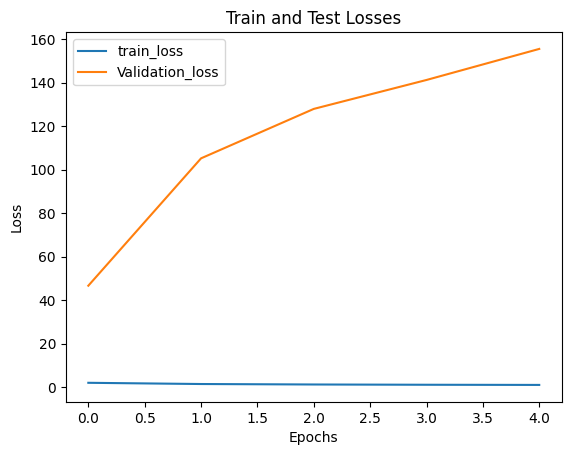

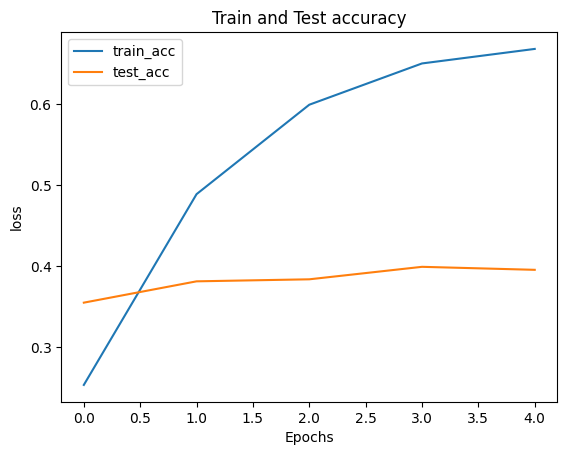

In [27]:
# eğitim ve test loss değerlerini alalım ( değerlendirme için)
train_loss = norm_history.history["loss"]
test_loss = norm_history.history["val_loss"]

train_acc = norm_history.history["Accuracy"]
test_acc = norm_history.history["val_Accuracy"]

plt.plot(train_loss, label="train_loss")
plt.plot(test_loss,label="Validation_loss")
plt.title("Train and Test Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(train_acc,label="train_acc")
plt.plot(test_acc,label="test_acc")
plt.title("Train and Test accuracy")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [29]:
#train for longer (maybe 10-20 epochs)

model = keras.Sequential([
    layers.Flatten(input_shape=INPUT_SHAPE,name="input_shape"),
    layers.Dense(4,activation="relu"),
    layers.Dense(4,activation="relu"),
    layers.Dense(10,activation="softmax")
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])
long_model_hist = model.fit(X_train,X_labels, epochs=10,
                            validation_data=(y_train,y_labels),
                            callbacks=[Early_stopping])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9639 - accuracy: 0.1951 - val_loss: 36.7797 - val_accuracy: 0.1995
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6722 - accuracy: 0.2783 - val_loss: 81.9406 - val_accuracy: 0.2000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5640 - accuracy: 0.3430 - val_loss: 117.7330 - val_accuracy: 0.2004
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4992 - accuracy: 0.3711 - val_loss: 149.3703 - val_accuracy: 0.2006
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4600 - accuracy: 0.3819 - val_loss: 157.9155 - val_accuracy: 0.2003
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4342 - accuracy: 0.3905 - val_loss: 166.0984 - val_accuracy: 0.2004
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4162 - accuracy: 0.3974 - val_loss: 180.7125 - v

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_shape (Flatten)       (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 4)                 3140      
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
#hmm the model didn't get well that much

#train for longer (maybe 10-20 epochs)

model = keras.Sequential([
    layers.Flatten(input_shape=INPUT_SHAPE,name="input_shape"),
    layers.Dense(4,activation="relu"),
    layers.Flatten(),
    layers.Dense(4,activation="relu"),
    layers.Flatten(),
    layers.Dense(10,activation="softmax")
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])
long2_model_hist = model.fit(X_train,X_labels, epochs=10,
                            validation_data=(y_train,y_labels),
                            callbacks=[Early_stopping])

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.9512 - accuracy: 0.1857 - val_loss: 48.1119 - val_accuracy: 0.1997
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6682 - accuracy: 0.2773 - val_loss: 76.4901 - val_accuracy: 0.1967
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5640 - accuracy: 0.3796 - val_loss: 146.2059 - val_accuracy: 0.1989
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4250 - accuracy: 0.4600 - val_loss: 268.4543 - val_accuracy: 0.1985
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3109 - accuracy: 0.5030 - val_loss: 368.5662 - val_accuracy: 0.1982
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2233 - accuracy: 0.5343 - val_loss: 408.4744 - val_accuracy: 0.1983
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1543 - accuracy: 0.5471 - val_loss: 437.4296 - v

In [ ]:
# this model better but still we got 0.57 percent acc

In [36]:

model = keras.Sequential([
    layers.Flatten(input_shape=INPUT_SHAPE,name="input_shape"),
    layers.BatchNormalization(),
    layers.Dense(4,activation="relu"),
    layers.Flatten(),
    layers.Dense(4,activation="relu"),
    layers.Flatten(),
    layers.Dense(10,activation="softmax")
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])
long2_model_hist = model.fit(X_train,X_labels, epochs=10,
                            validation_data=(y_train,y_labels),
                            callbacks=[Early_stopping])

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2939 - accuracy: 0.5010 - val_loss: 199.8318 - val_accuracy: 0.4169
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.8576 - accuracy: 0.6689 - val_loss: 178.4945 - val_accuracy: 0.4616
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7803 - accuracy: 0.7043 - val_loss: 153.9844 - val_accuracy: 0.5028
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7322 - accuracy: 0.7299 - val_loss: 142.1426 - val_accuracy: 0.5104
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7002 - accuracy: 0.7486 - val_loss: 141.3266 - val_accuracy: 0.5136
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6736 - accuracy: 0.7605 - val_loss: 138.3161 - val_accuracy: 0.5081
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6556 - accuracy: 0.7666 - val_loss: 148.2332 -

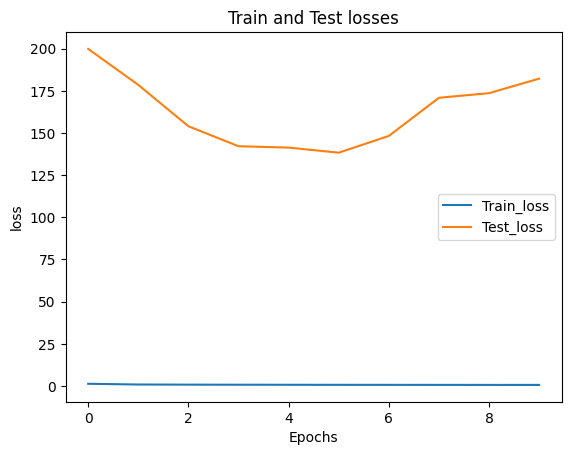

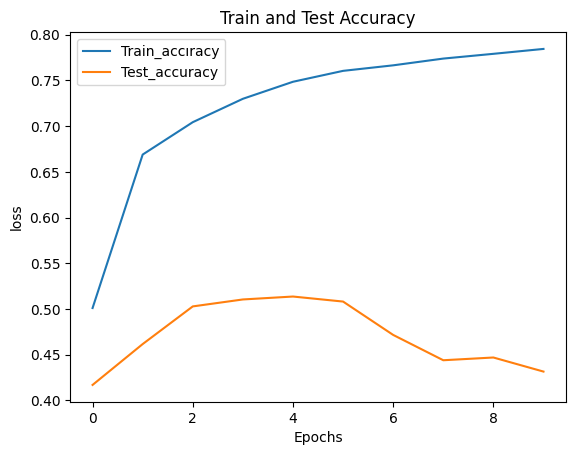

In [41]:
train_loss  = long2_model_hist.history["loss"]
test_loss = long2_model_hist.history["val_loss"]

train_acc = long2_model_hist.history["accuracy"]
test_acc= long2_model_hist.history["val_accuracy"]



plt.plot(train_loss, label="Train_loss")
plt.plot(test_loss,label="Test_loss")
plt.title("Train and Test losses")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


plt.plot(train_acc, label="Train_accıracy")
plt.plot(test_acc,label="Test_accuracy")
plt.title("Train and Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()
